# 0.0. IMPORTS


In [48]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns

#import matplotlib from  subplot

import matplotlib.pyplot as plt

## 0.1 Helper Funcions

## 0.2 Loaging data

In [3]:
#carregamento dos csv 

df_sales_raw = pd.read_csv('data/train.csv', low_memory=False )
df_store_raw = pd.read_csv('data/store.csv', low_memory=False )

#merge
#união dos df store e df sales
df_raw = pd.merge(df_sales_raw, df_store_raw, how ='left', on='Store')



# 1.0. DESCRICAO DOS DADOS

In [4]:
#copia do df
df1 = df_raw.copy()


# 1.1.  Rename Columns

In [10]:
#remoneação das colunas 

cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
             'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
              'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new  = list (map(snakecase, cols_old))

#remane 
df1.columns = cols_new


# 1.2. Data Dimensions 

In [11]:
print( 'Number of Rows: {}'.format( df1.shape[0]))
print( 'Number of cols: {}'.format( df1.shape[1]))

Number of Rows: 1017209
Number of cols: 18


# 1.1. Data Types

In [12]:
#tipos de dados de cada coluna
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes


store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

# 1.1. Check NA

In [17]:
df1.isna().sum()
#linhas com NA

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

# 1.5. Fillout NA

In [14]:
df1['competition_distance'].max()

75860.0

In [15]:
#competition_distance           
df1['competition_distance'] = df1['competition_distance'].apply (lambda x: 200000.0 if math.isnan(x) else x)
##substituir os NA da competition distance acima do valor maximo, usar o lambda para criar a função, usra o apply para aplicar nas colunas, substituir essa coluna 
#na coluna original.


#competition_open_since_month 
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month']) else x['competition_open_since_month'],axis=1 )
# se a coluna for NA irá extrair o mês dela, se não for era permanecer. por fim sobre escreve a coluna original


#competition_open_since_year
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1 )



#promo2_since_week    
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1 )


#promo2_since_year
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1 )


#promo_interval  
month_map = {1: 'jan', 2: 'fev', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec', }

df1['promo_interval'].fillna(0, inplace=True)
#coluna com NA igual a zero (inplace true não retorna valor modifica na propria coluna)

df1['month_map'] = df1['date'].dt.month.map(month_map)


df1['is_promo'] = df1[['promo_interval', 'month_map']].apply (lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)
#quebrar as linhas com split, ver se o elemento da coluna esta na lista, se sim retorna 1 se não retorna 0, se promo_interval for igual a 0 retorno 0 se nãp volto igual a 1
#promo_interval e month_map como filtros





In [16]:
df1.sample(5).T

,823970,108067,730763,699185,325061
store,771,1028,109,866,949
day_of_week,7,7,6,7,7
date,2013-06-23 00:00:00,2015-04-26 00:00:00,2013-09-14 00:00:00,2013-10-13 00:00:00,2014-09-28 00:00:00
sales,0,0,4441,0,0
customers,0,0,550,0,0
open,0,0,1,0,0
promo,0,0,0,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,a,a,a,d,a


In [18]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

# 1.6. CHange Types

In [19]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)


df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)


# 1.7. Descriptive Statistical

In [20]:
num_attributes = df1.select_dtypes(include = ['int64','float64'])
 
cat_attributes = df1.select_dtypes(exclude = ['int64','float64', 'datetime64[ns]']) 

# 1.7.1 Numeriacal Attributes

In [ ]:
# skew deformação da distribuicao em relação a normal, mais para esquerda skew positiva, mais para esquerda skew negativa

#kurtosis concentração dos dados, quando positiva mais dados concentrados, pico alto, mais disperso negativo 


In [31]:
# central tendency - maen , median 
ct1 = pd.DataFrame( num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame( num_attributes.apply(np.median)).T



# Dispersion - atd, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply( np.std )).T
d2 = pd.DataFrame(num_attributes.apply( min )).T
d3 = pd.DataFrame(num_attributes.apply( max )).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

#concatenate (concatenar = unir)
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median','std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


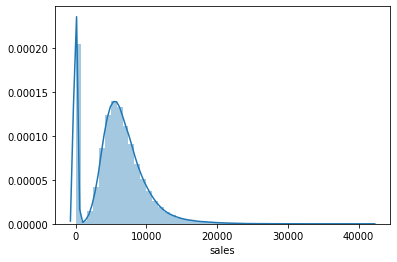

In [34]:
sns.distplot(df1['sales'])

# 1.7.1 Categorical Attributes

In [36]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

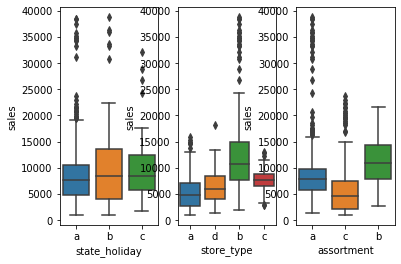

In [58]:
#auxiliar satate_holiday diferente de 0 e vendes acima de 0
aux1 = df1[(df1['state_holiday'] !='0')  & (df1['sales']>0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales',data=aux1)
figsize=(10)

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales',data=aux1)
figsize=(10)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales',data=aux1)
figsize=(10)


# 1.1. 